# Module 1 Practice: John Snow's Cholera Map 

In this practice, we will load the data for John Snow's cholera map from `/dsa/data/all_datasets/CholeraDeathsPumps.csv`. It has the number of deaths and geographical coordinates of the deaths and water pumps (where count is -999). 

We will do simple scatter plots using the **`ggplot2`** library; it has many useful functions to create nice plots and graphics. Here is a handy [cheatsheet for ggplot2 library](https://github.com/rstudio/cheatsheets/blob/master/data-visualization-2.1.pdf), and the [full documentation](https://cran.r-project.org/web/packages/ggplot2/ggplot2.pdf).

**The following are examples to start using ggplot for simple plots:** 

In [7]:
# load ggplot library 
library(ggplot2)


# First, make up a data frame 
df <- data.frame(replicate(3,sample(0:100,10,rep=TRUE)))
df
str(df)

ERROR: Error in parse(text = x, srcfile = src): <text>:3:8: unexpected symbol
2: library(ggplot2)
3: import pandas
          ^


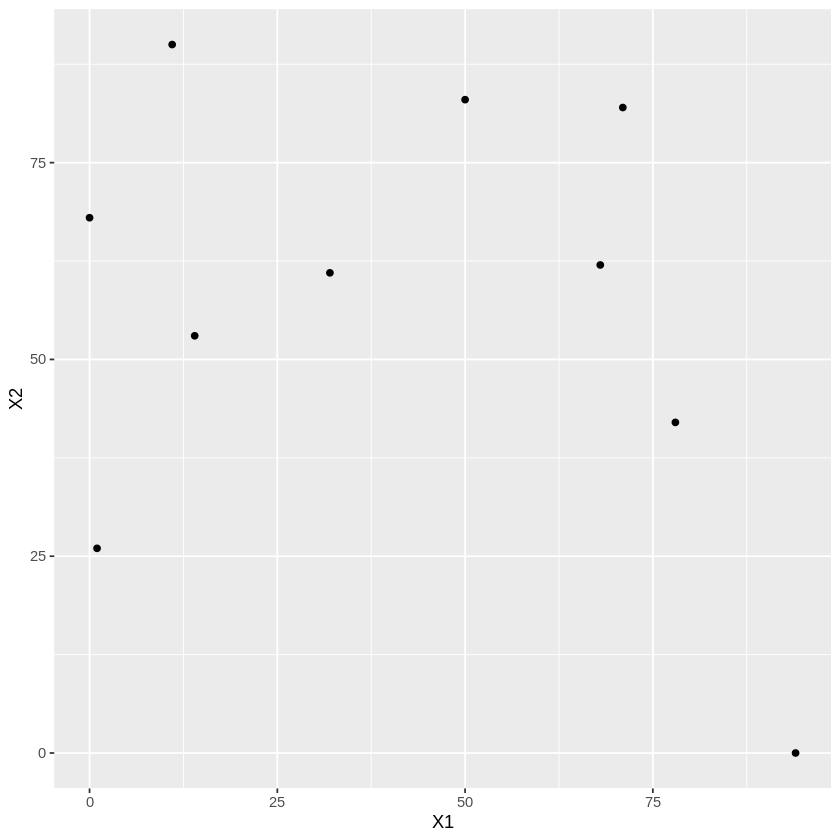

In [3]:
# every ggplot "object" should define the data frame to be used for plotting, 
# and the "aesthetics" that is the mapping between the columns of the data set and the plot. 
plot1 <- ggplot(data=df, mapping=aes(x=X1, y=X2))

# now add a "geom" to tell what type of plot it'll be: here, it's a scatter plot. 
plot1 <- plot1 + geom_point()

# display it. 
plot1

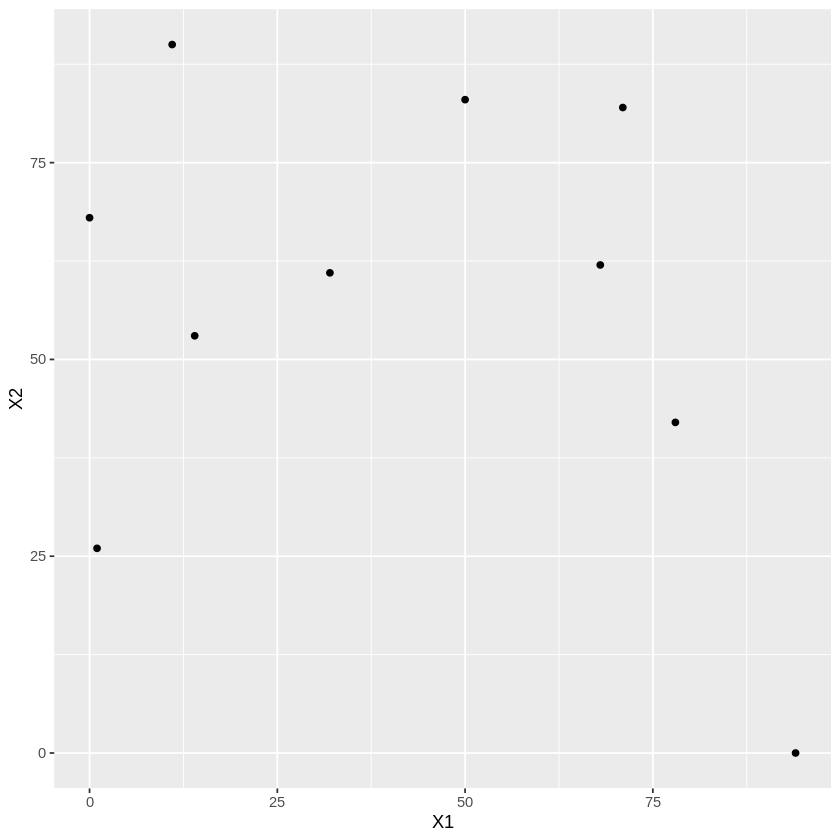

In [4]:
# The following is same as above, relying on defaults and doing everything in one line: 

ggplot(df, aes(X1, X2)) + geom_point() 


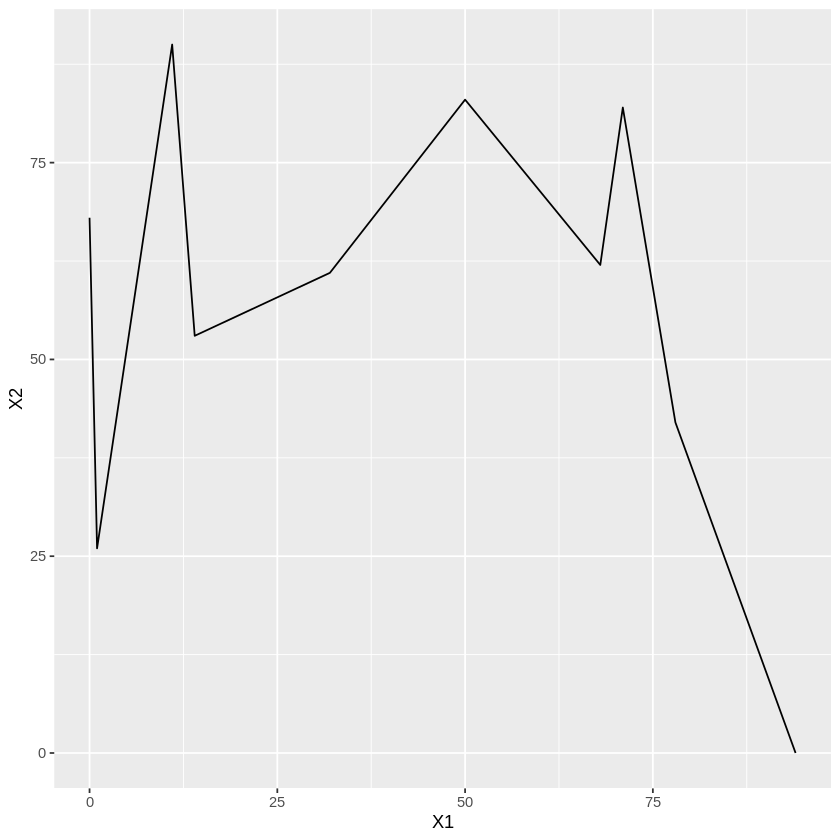

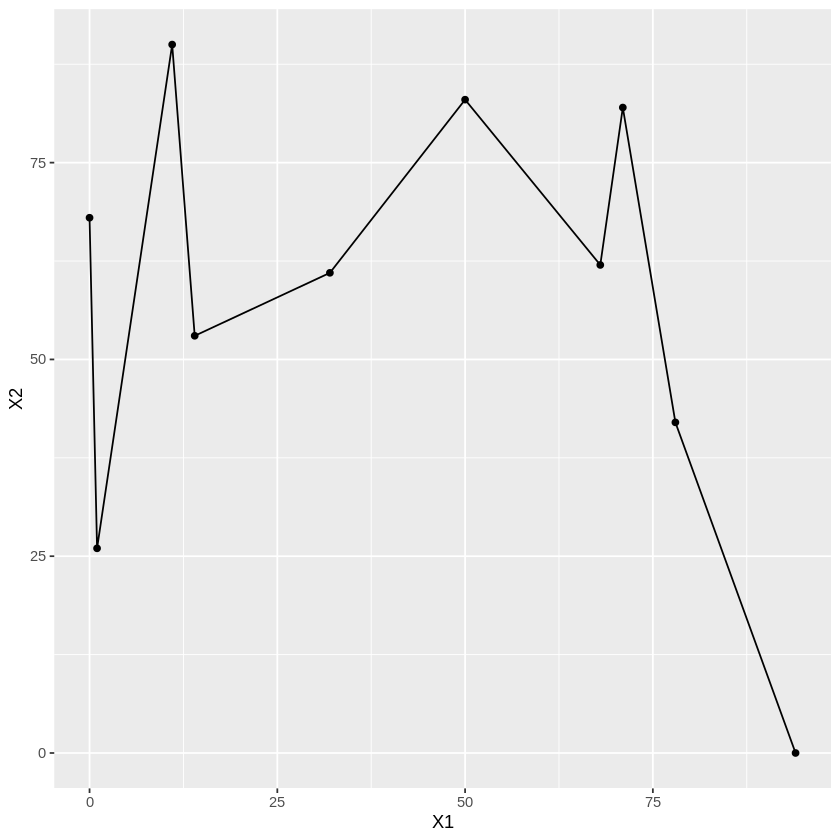

In [5]:
# Let's do a line plot: 

p1 <- ggplot(df, aes(x=X1,y=X2)) + geom_line() 
p1

# or both, we can keep adding different layers like this: 

p1 <- p1 + geom_point()
p1


**Now, we will do the following activities:** 

In [8]:
# Activity 1: read the Cholera data into a data frame, show head and tail 

df <- read.csv('/dsa/data/all_datasets/CholeraDeathsPumps.csv')

head(df)
tail(df)


count,long,lat
<int>,<dbl>,<dbl>
3,-0.137930,51.51342
2,-0.137883,51.51336
1,-0.137853,51.51332
1,-0.137812,51.51326
4,-0.137767,51.51320
2,-0.137537,51.51318


,count,long,lat
,<int>,<dbl>,<dbl>
253,-999,-0.139671,51.51491
254,-999,-0.131630,51.51235
255,-999,-0.133594,51.51214
256,-999,-0.135919,51.51154
257,-999,-0.133962,51.51002
258,-999,-0.138199,51.51129


In [34]:
# Activity 2: separate deaths and pumps to separate data frames 
library(dplyr)
wpumps <- filter(df, count == -999)
cdeaths <- filter(df, count != -999)
df <- df %>% mutate(deathorpump =
                     case_when(count == -999 ~ "pump", 
                               count != -999 ~ "death",))
head(wpumps)
tail(cdeaths)

count,long,lat,deathorpump
<int>,<dbl>,<dbl>,<chr>
-999,-0.136668,51.51334,pump
-999,-0.139586,51.51388,pump
-999,-0.139671,51.51491,pump
-999,-0.131630,51.51235,pump
-999,-0.133594,51.51214,pump
-999,-0.135919,51.51154,pump


,count,long,lat,deathorpump
,<int>,<dbl>,<dbl>,<chr>
245,2,-0.137707,51.51479,death
246,3,-0.137108,51.51453,death
247,2,-0.137065,51.51471,death
248,1,-0.138474,51.51231,death
249,1,-0.138123,51.51200,death
250,1,-0.137762,51.51186,death


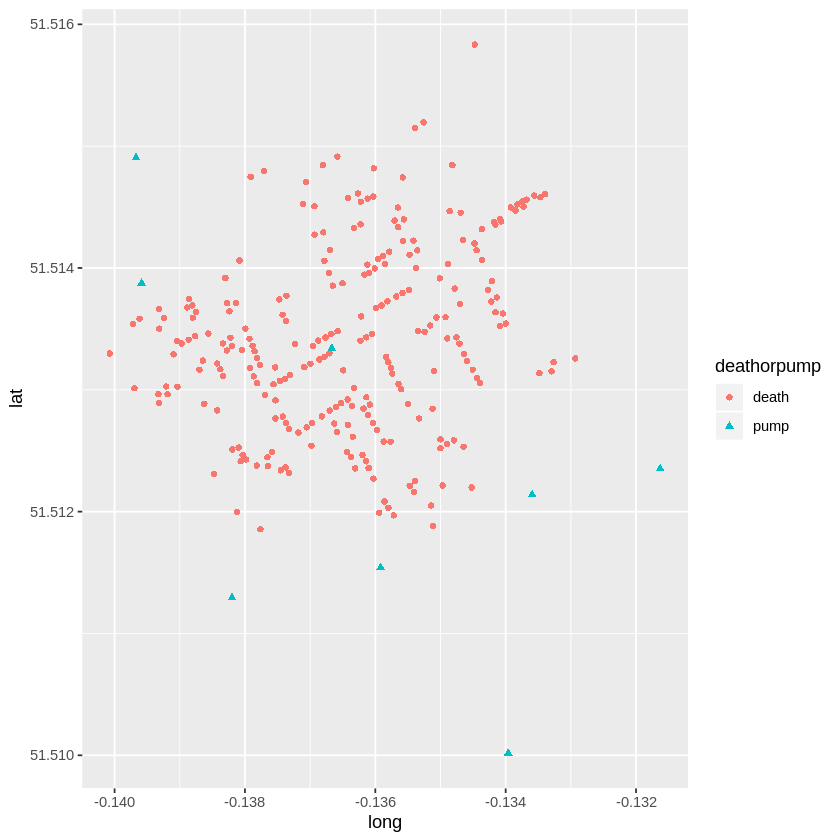

In [24]:
# Activity 3: plot all data points as a scatter plot; define aesthetics

p2 <- ggplot(data=df,aes(x=long,y=lat, color = deathorpump, shape = deathorpump))
p2 <- p2 + geom_point() 
p2

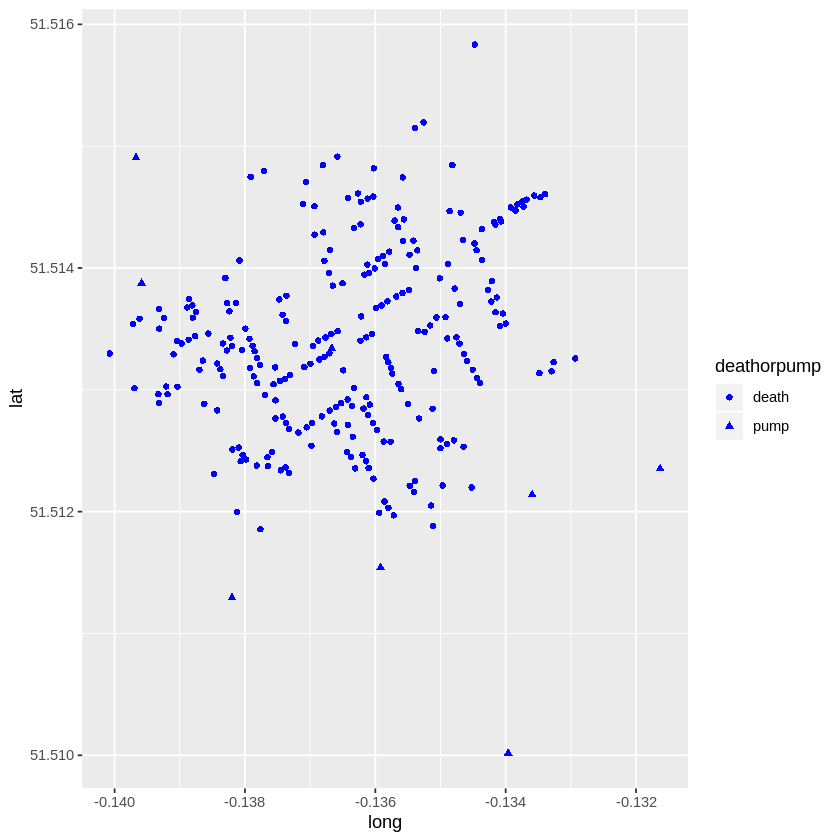

In [29]:
# Activity 4: change color of the points to blue 
p3 <- ggplot(data=df,aes(x=long,y=lat,shape = deathorpump))
p3 <- p3 + geom_point(colour = 'blue') 
p3


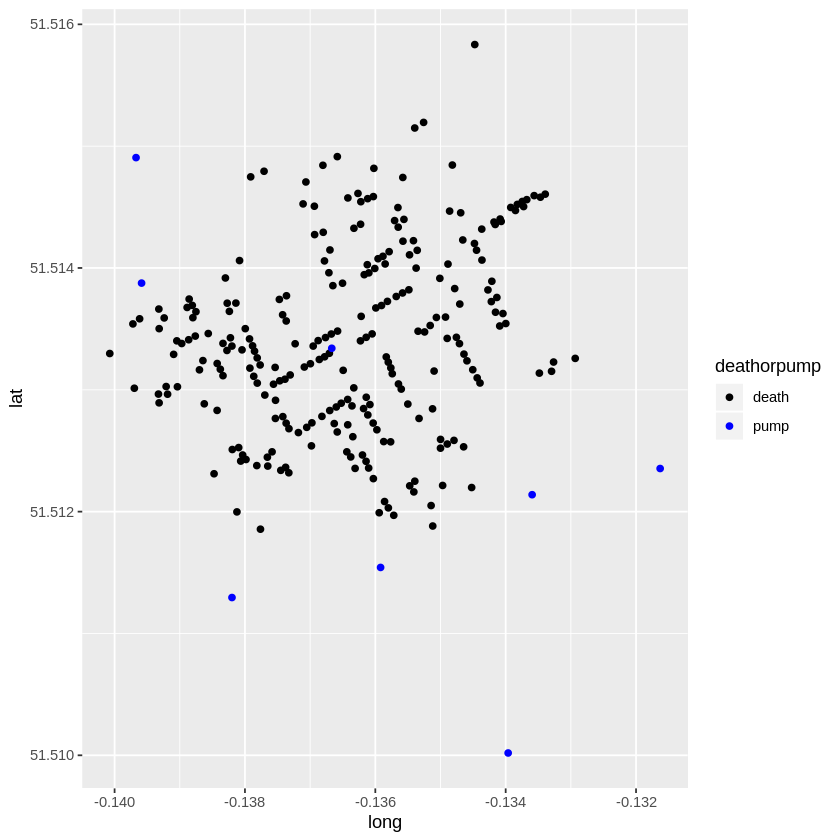

In [30]:
# Activity 5: plot deaths and pumps separately on the same plot (pumps: blue, deaths: black)
p4 <- ggplot(data=df,aes(x=long,y=lat,color = deathorpump, shape = deathorpump))
p4 <- p4 + geom_point() + scale_color_manual(values = c('pump'='blue', 'death' = 'black'))
p4


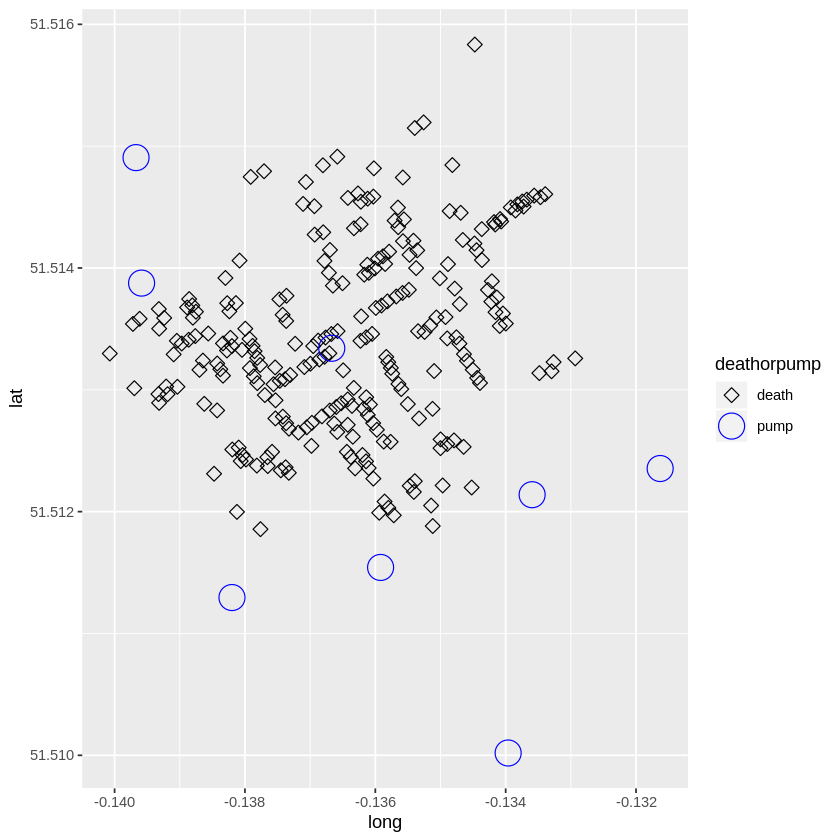

In [33]:
# Activity 6: Make pumps bigger, change the shape of deaths to diamond (hint: use shape=23)
p4 <- ggplot(data=df,aes(x=long,y=lat,color = deathorpump, shape = deathorpump))
p4 <- p4 + geom_point(aes(size = deathorpump)) + scale_color_manual(values = c('pump'='blue', 'death' = 'black')) + scale_size_manual(values = c('death' = 3,'pump' = 7)) + scale_shape_manual(values=c('death' = 23, 'pump' = 1))
p4

### Question: Does this plot show counts of deaths ? How do we incorporate that column to this plot ? 


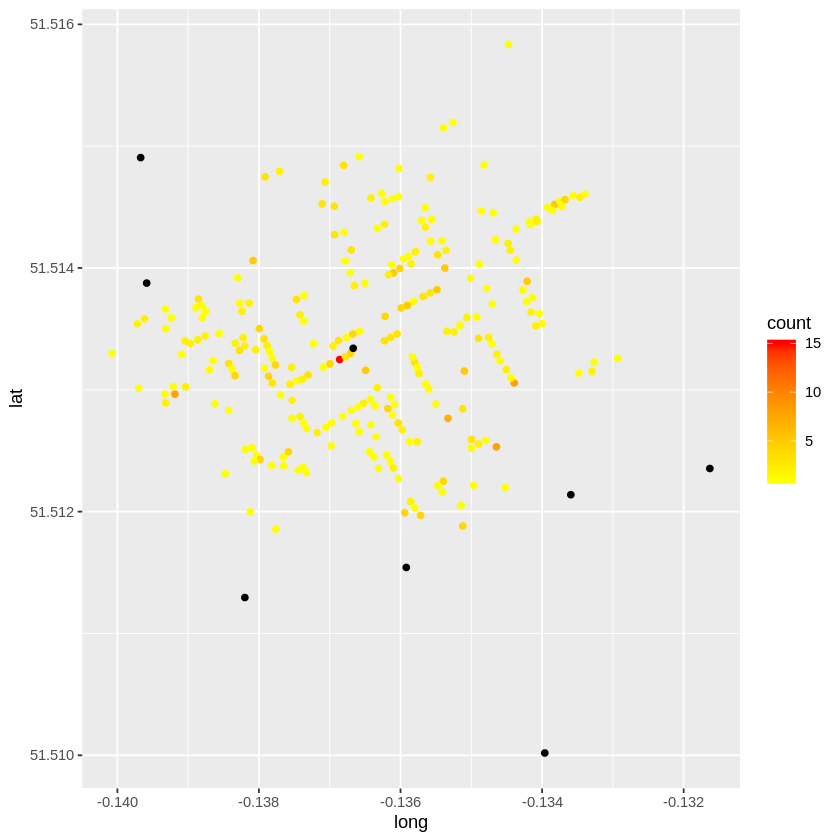

In [61]:
# Activity 7: FIND a way of showing number of deaths in the plot

p5 <- ggplot(NULL ,aes(x=long,y=lat)) + geom_point(data = cdeaths, aes(colour = count)) + scale_colour_gradient(
  low = "yellow",
  high = "red",
  space = "Lab",
  na.value = "grey50",
  guide = "colourbar",
  aesthetics = "colour" )
p5 <- p5 + geom_point(data = wpumps)
p5